# PULSIFI Coding Test Question 2

Build a model to **predict z from x and y**. Some questions to consider: 

1.   What kind of model is appropriate in this case considering the graphs?
2.   How to do feature selection?
3.   How to measure the performance of the model?
4.  How to interpret the result?

## Import necessary libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Get the data

In [2]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#locate the data
!ls "../content/drive/My Drive/ColabNotebooks/pulsifi"

'Data Assessment.gdoc'	 Pulsifi_Q2.ipynb   test.csv


## Exploratory Data Analysis

Let's look what does this data looks like.

In [4]:
df = pd.read_csv("../content/drive/My Drive/ColabNotebooks/pulsifi/test.csv")
df.describe()

,Unnamed: 0,x,y,z
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,0.499059,0.493749,0.496727
std,288.819436,0.287739,0.346935,0.354016
min,0.000000,0.000070,-0.405017,-0.396111
25%,249.750000,0.248916,0.230222,0.236340
50%,499.500000,0.489521,0.485361,0.501613
75%,749.250000,0.745500,0.756520,0.755619
max,999.000000,0.999722,1.387614,1.373976


In [5]:
df.head()

,Unnamed: 0,x,y,z
0,0,0.824922,0.812338,0.698686
1,1,0.288478,0.697308,0.544378
2,2,0.586509,0.715296,0.655423
3,3,0.225562,0.355839,0.542703
4,4,0.030121,-0.097980,0.389870


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
Unnamed: 0    1000 non-null int64
x             1000 non-null float64
y             1000 non-null float64
z             1000 non-null float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB


In [7]:
df = df.drop(columns=["Unnamed: 0"])
df.head()

,x,y,z
0,0.824922,0.812338,0.698686
1,0.288478,0.697308,0.544378
2,0.586509,0.715296,0.655423
3,0.225562,0.355839,0.542703
4,0.030121,-0.097980,0.389870


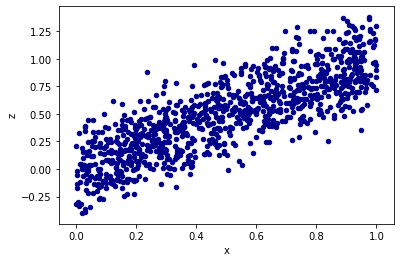

In [8]:
# create a scatter plot for the data for x vs z

ax1 = df.plot.scatter(x='x',
                      y='z',
                      c="DarkBlue")

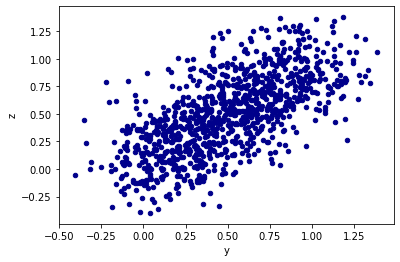

In [9]:
# create a scatter plot for the data for y vs z

ax2 = df.plot.scatter(x='y',
                      y='z',
                      c="DarkBlue")

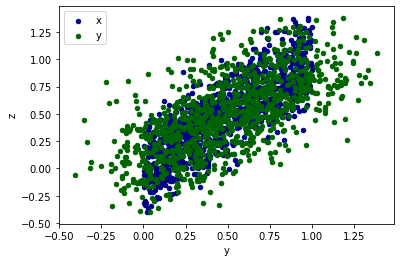

In [10]:
# create a scatter plot for the data for x,y vs z

ax = df.plot(kind='scatter', x='x', y='z', color='DarkBlue', label='x')
df.plot(kind='scatter', x='y', y='z',color='DarkGreen', label='y', ax=ax);


### Plot a desicion boundary for the data



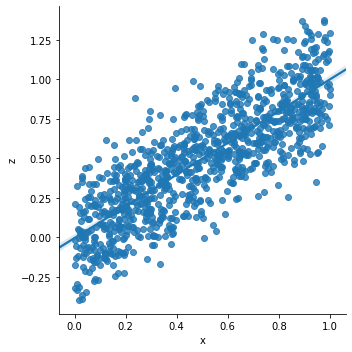

In [11]:
sns.lmplot(x='x',y='z',data=df)

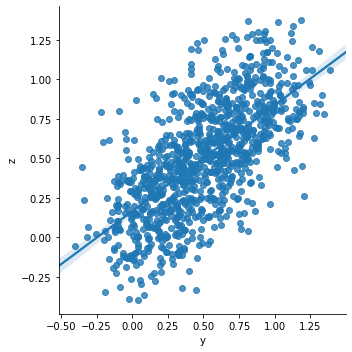

In [12]:
sns.lmplot(x='y',y='z',data=df)

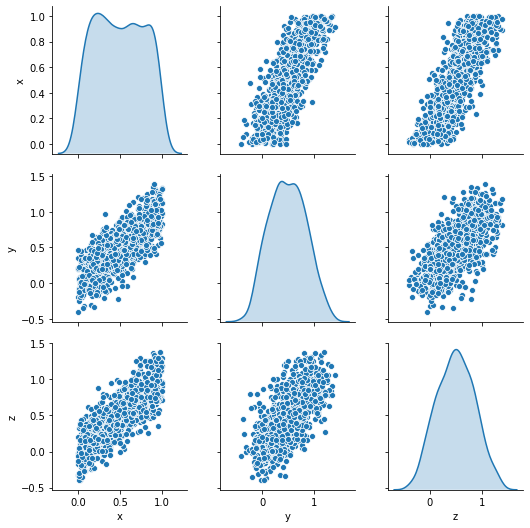

In [13]:
sns.pairplot(df[["x","y","z"]], diag_kind="kde")

### Check the features correlation

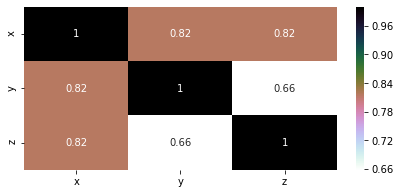

In [14]:
plt.figure(figsize=(7,3)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

Conclusion:

1.   x and y are directly proportional to z
2.   x has a correlation of 0.82 to y, same goes to x to z.
3.   y has a correlation of 0.66 to z. 



## Machine Learning

### Split the data into train and test set


In [15]:
from sklearn.model_selection import train_test_split as split
train, test = split(df, test_size = 0.2)
print (train.shape)
print (test.shape)

(800, 3)
(200, 3)


In [16]:
#get the features for training data
X_train = train[['x','y']]
#output(label) of training data
y_train = train['z']
#get the testing data features and output(label)
X_test = test[['x', 'y']]
y_test = test['z']

print(X_train.shape)

(800, 2)


#### Train and Predict by using Support Vector Machine Regressor

In [17]:
# Create and train the Support Vector Machine (Regressor) 

from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr.score(X_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.654253784296825


In [19]:
y_pred = svr.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
882,0.635055,0.735560
905,0.367899,0.498571
686,0.694686,0.907311
652,1.057951,0.898404
575,0.514053,0.618977
...,...,...
324,0.798164,0.783976
319,0.757740,0.834779
573,0.735321,0.704465
345,0.217346,0.558075


In [20]:
from sklearn.metrics import mean_absolute_error

print("MAE by using SVM is {}.".format(mean_absolute_error(y_test,y_pred)))

MAE by using SVM is 0.16348008551487558.


#### Train and Predict by using Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# Train the model
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#To retrieve the intercept:
print(lr.intercept_)
#For retrieving the slope:
print(lr.coef_)

0.0028496597592234107
[ 1.01576151 -0.01006107]


In [23]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(X_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.6491436987598449


In [24]:
y_pred = lr.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
882,0.635055,0.752153
905,0.367899,0.498231
686,0.694686,0.923330
652,1.057951,0.933880
575,0.514053,0.607501
...,...,...
324,0.798164,0.804316
319,0.757740,0.861733
573,0.735321,0.717288
345,0.217346,0.538029


In [25]:
print("MAE by using linear regression is {} ".format(mean_absolute_error(y_test,y_pred)))

MAE by using linear regression is 0.16531591213805782 


#### Train and Predict by using Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [27]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
rf_confidence = rf.score(X_test, y_test)
print("rf confidence: ", rf_confidence)

rf confidence:  0.5817734829195799


In [28]:
y_pred = rf.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
882,0.635055,0.571494
905,0.367899,0.614291
686,0.694686,0.968423
652,1.057951,1.029562
575,0.514053,0.561813
...,...,...
324,0.798164,0.963273
319,0.757740,0.913193
573,0.735321,0.582348
345,0.217346,0.595873


In [29]:
print("MAE by using random forest regressor is {} ".format(mean_absolute_error(y_test,y_pred)))

MAE by using random forest regressor is 0.1861408435991416 


#### Train Model by using XGBoost Regressor



In [30]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
# Train the model
xgb.fit(X_train, y_train)

[12:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [31]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
xgb_confidence = xgb.score(X_test, y_test)
print("xgb confidence: ", xgb_confidence)

xgb confidence:  0.6313307371709078


In [32]:
y_pred = xgb.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
882,0.635055,0.729872
905,0.367899,0.541699
686,0.694686,1.044709
652,1.057951,1.030410
575,0.514053,0.596188
...,...,...
324,0.798164,0.908183
319,0.757740,0.828774
573,0.735321,0.713546
345,0.217346,0.560543


In [33]:
print("MAE by using XGBoost regressor is {} ".format(mean_absolute_error(y_test,y_pred)))

MAE by using XGBoost regressor is 0.17059446525884886 


#### Train and Predict by using MLP

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout,  Activation
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend.


In [0]:
X_train, X_val, y_train, y_val = split(X_train, y_train, test_size = 0.2)

In [36]:
model = Sequential()
model.add(Dense(1000, input_dim=2,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(500, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 504,001
Trainable params: 504,001
Non-trainable params: 0
_____________________________________________________________

In [37]:
!pip install keras-rectified-adam

In [38]:
from keras_radam import RAdam

model.compile(loss='mse', optimizer=RAdam(), metrics=['mse','mae'])
checkpointer = [
    ReduceLROnPlateau(monitor='val_loss', 
                      patience=3, 
                      verbose=1,
                      factor=0.5,
                      min_lr = 0.00001,
                      cooldown=0),
    ModelCheckpoint(filepath='best.hdf5', verbose=1, 
                               save_best_only=True)
]
history = model.fit(X_train, y_train, epochs=150, batch_size=128,  verbose=1, validation_data=[X_val, y_val], shuffle=True, callbacks=checkpointer)
train_acc = model.evaluate(X_train, y_train, verbose=0)
val_acc = model.evaluate(X_val, y_val, verbose=0)





Train on 640 samples, validate on 160 samples
Epoch 1/150





640/640 [==============================] - 1s 2ms/step - loss: 0.3447 - mean_squared_error: 0.3447 - mean_absolute_error: 0.4995 - val_loss: 0.3080 - val_mean_squared_error: 0.3080 - val_mean_absolute_error: 0.4530

Epoch 00001: val_loss improved from inf to 0.30802, saving model to best.hdf5
Epoch 2/150
640/640 [==============================] - 0s 43us/step - loss: 0.3228 - mean_squared_error: 0.3228 - mean_absolute_error: 0.4797 - val_loss: 0.2638 - val_mean_squared_error: 0.2638 - val_mean_absolute_error: 0.4182

Epoch 00002: val_loss improved from 0.30802 to 0.26384, saving model to best.hdf5
Epoch 3/150
640/640 [==============================] - 0s 38us/step - loss: 0.2652 - mean_squared_error: 0.2652 - mean_absolute_error: 0.4319 - val_loss: 0.2023 - val_mean_squared_error: 0.2023 - val_mean_absolute_error: 0.3645

Epoch 00003: val_loss improved from 0.26384 to 0.20232, saving model to best.hdf5
Epoch 4/150
640/6

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error', 'lr'])


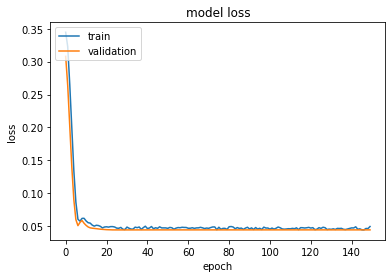

In [39]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('best.hdf5')

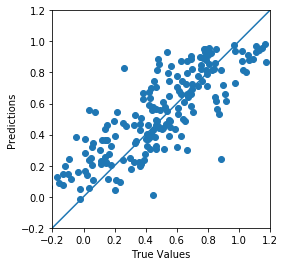

In [41]:
test_predictions =model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-0.2, 1.2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

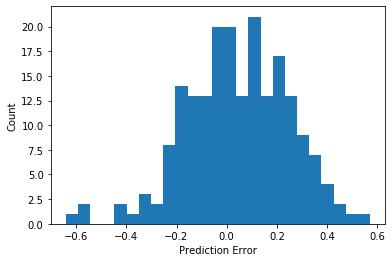

In [42]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [43]:
for true, pred in zip(y_test, test_predictions):
  if pred == true:
    print("{}\t -> {}".format(true, pred))
  else:
    print("\033[1m{}\t -> {}\033[0m".format(true, pred))

0.6350547871993133	 -> 0.7452409863471985
0.3678993626512776	 -> 0.5044829249382019
0.6946856898612881	 -> 0.9079409241676331
1.0579506389519002	 -> 0.9158005714416504
0.5140534172654655	 -> 0.6109345555305481
0.6111393135128188	 -> 0.5296550393104553
0.3329516381022221	 -> 0.3447270095348358
-0.04547122460931097	 -> 0.3852173388004303
0.4067415366111178	 -> 0.4056772291660309
0.3247918977319727	 -> 0.22372588515281677
0.06385805309449594	 -> 0.11026342213153839
0.855292553847653	 -> 0.9508606791496277
0.17840295677754114	 -> 0.32931196689605713
0.020074508927128518	 -> 0.14078456163406372
0.9745515591517542	 -> 0.72922283411026
-0.17389310160275412	 -> 0.12450326979160309
0.643894605079315	 -> 0.6077423691749573
1.0452869653271601	 -> 0.8031653761863708
0.821293683637365	 -> 0.9272658228874207
0.5299216502903961	 -> 0.4671308398246765
0.255629183198977	 -> 0.47494205832481384
0.5478802304654956	 -> 0.6516675353050232
0.9095218036811864	 -> 0.6597619652748108
0.4183712680434184	 -> 0.3

In [44]:
oss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.4f}".format(mae))

Testing set Mean Abs Error: 0.0434


## Conclusion(1):

The classical machine learning model like SVM, XGBoost, Linear regression and random forest have mean absolute error of around 0.18, meanwhile the MLP has a mean absolute error of 0.0434.

As x is correlate to y and z for 0.82, below, I am just going to predict the z by using x values only.

### Predict the z by using x only

#### Use x only as the features

In [45]:
#get the features for training data
X_train = train[['x']]
#output(label) of training data
y_train = train['z']
#get the testing data features and output(label)
X_test = test[['x']]
y_test = test['z']

print(X_train.shape)

(800, 1)


### Using SVM regressor

In [46]:
# Create and train the Support Vector Machine (Regressor) 

from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1e3, gamma=0.1) 
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr.score(X_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.6553878360737745


In [48]:
y_pred = svr.predict(X_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred

,Actual,Predicted
882,0.635055,0.742968
905,0.367899,0.506902
686,0.694686,0.902409
652,1.057951,0.910054
575,0.514053,0.606174
...,...,...
324,0.798164,0.791702
319,0.757740,0.842441
573,0.735321,0.710743
345,0.217346,0.539669


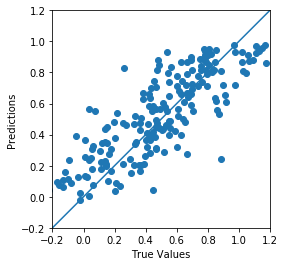

In [49]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred.flatten())
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-0.2, 1.2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [50]:
print("MAE by using SVM is {}.".format(mean_absolute_error(y_test,y_pred)))

MAE by using SVM is 0.1633456256028708.


### Using MLP

In [0]:
X_train, X_val, y_train, y_val = split(X_train, y_train, test_size = 0.2)

In [52]:
model2 = Sequential()
model2.add(Dense(1000, input_dim=1,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(500, activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='linear'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              2000      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 501       
Total params: 503,001
Trainable params: 503,001
Non-trainable params: 0
_________________________________________________________________


In [53]:
from keras_radam import RAdam

model2.compile(loss='mse', optimizer=RAdam(), metrics=['mse','mae'])
checkpointer = [
    ReduceLROnPlateau(monitor='val_loss', 
                      patience=3, 
                      verbose=1,
                      factor=0.5,
                      min_lr = 0.00001,
                      cooldown=0),
    ModelCheckpoint(filepath='best.hdf5', verbose=1, 
                               save_best_only=True)
]
history = model2.fit(X_train, y_train, epochs=150, batch_size=128,  verbose=1, validation_data=[X_val, y_val], shuffle=True, callbacks=checkpointer)
train_acc = model2.evaluate(X_train, y_train, verbose=0)
val_acc = model2.evaluate(X_val, y_val, verbose=0)

Train on 640 samples, validate on 160 samples
Epoch 1/150
640/640 [==============================] - 0s 549us/step - loss: 0.3765 - mean_squared_error: 0.3765 - mean_absolute_error: 0.5230 - val_loss: 0.3095 - val_mean_squared_error: 0.3095 - val_mean_absolute_error: 0.4548

Epoch 00001: val_loss improved from inf to 0.30954, saving model to best.hdf5
Epoch 2/150
640/640 [==============================] - 0s 39us/step - loss: 0.3500 - mean_squared_error: 0.3500 - mean_absolute_error: 0.5036 - val_loss: 0.2770 - val_mean_squared_error: 0.2770 - val_mean_absolute_error: 0.4283

Epoch 00002: val_loss improved from 0.30954 to 0.27701, saving model to best.hdf5
Epoch 3/150
640/640 [==============================] - 0s 34us/step - loss: 0.3026 - mean_squared_error: 0.3026 - mean_absolute_error: 0.4665 - val_loss: 0.2310 - val_mean_squared_error: 0.2310 - val_mean_absolute_error: 0.3877

Epoch 00003: val_loss improved from 0.27701 to 0.23099, saving model to best.hdf5
Epoch 4/150
640/640 [===

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error', 'lr'])


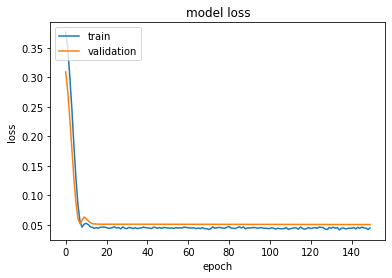

In [54]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
# load the weights that yielded the best validation accuracy
model2.load_weights('best.hdf5')

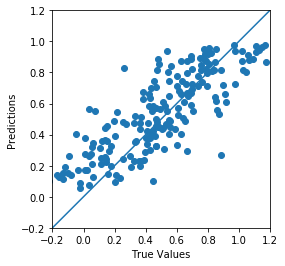

In [56]:
test_predictions =model2.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-0.2, 1.2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

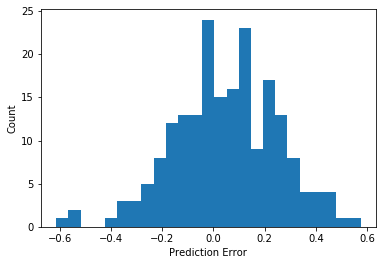

In [57]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [58]:
for true, pred in zip(y_test, test_predictions):
  if pred == true:
    print("{}\t -> {}".format(true, pred))
  else:
    print("\033[1m{}\t -> {}\033[0m".format(true, pred))

0.6350547871993133	 -> 0.745844841003418
0.3678993626512776	 -> 0.5106157064437866
0.6946856898612881	 -> 0.9072244763374329
1.0579506389519002	 -> 0.9149100184440613
0.5140534172654655	 -> 0.6082181334495544
0.6111393135128188	 -> 0.5259522795677185
0.3329516381022221	 -> 0.35499173402786255
-0.04547122460931097	 -> 0.40110069513320923
0.4067415366111178	 -> 0.4201183319091797
0.3247918977319727	 -> 0.23063147068023682
0.06385805309449594	 -> 0.12551096081733704
0.855292553847653	 -> 0.9493512511253357
0.17840295677754114	 -> 0.3238719701766968
0.020074508927128518	 -> 0.17043541371822357
0.9745515591517542	 -> 0.7247675657272339
-0.17389310160275412	 -> 0.13911764323711395
0.643894605079315	 -> 0.6111657023429871
1.0452869653271601	 -> 0.8018583059310913
0.821293683637365	 -> 0.9262722730636597
0.5299216502903961	 -> 0.4671308398246765
0.255629183198977	 -> 0.47953999042510986
0.5478802304654956	 -> 0.6492100954055786
0.9095218036811864	 -> 0.6601525545120239
0.4183712680434184	 -> 0

In [59]:
oss, mae, mse = model2.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.4f}".format(mae))

Testing set Mean Abs Error: 0.0441


## Conclusion

So, it just the same.

MLP gives you lower mean absolute error compared to the classical machine learning algorithms.

Mean Squared Error (MSE) is a common loss function used for regression problems (different loss functions are used for classification problems).

Similarly, evaluation metrics used for regression differ from classification. A common regression metric is Mean Absolute Error (MAE).

When numeric input data features have values with different ranges, each feature should be scaled independently to the same range, but I didn't do this  because the data are in the same range.

If there is not much training data, one technique is to prefer a small network with few hidden layers to avoid overfitting. 

I have tested with more hidden layer, different batch size and I have found that 2 layers are enough. 

I used RAdam as the optimizer as it is the newest one. 

I reduced the learning rate when the validation loss isn't improving and load the best model's weight to predict the data.

